In [195]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [198]:
heart_disease_df = pd.read_csv("https://raw.githubusercontent.com/Gifty0/Data_minor/main/heart.csv?token=GHSAT0AAAAAACNP3RQMELSQL462G7NRZVCKZQBP4ZQ")

In [199]:
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [200]:
heart_disease_df.info()
# info() function we can have some basic information about the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [201]:
print(selDF.columns)

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], dtype='object')


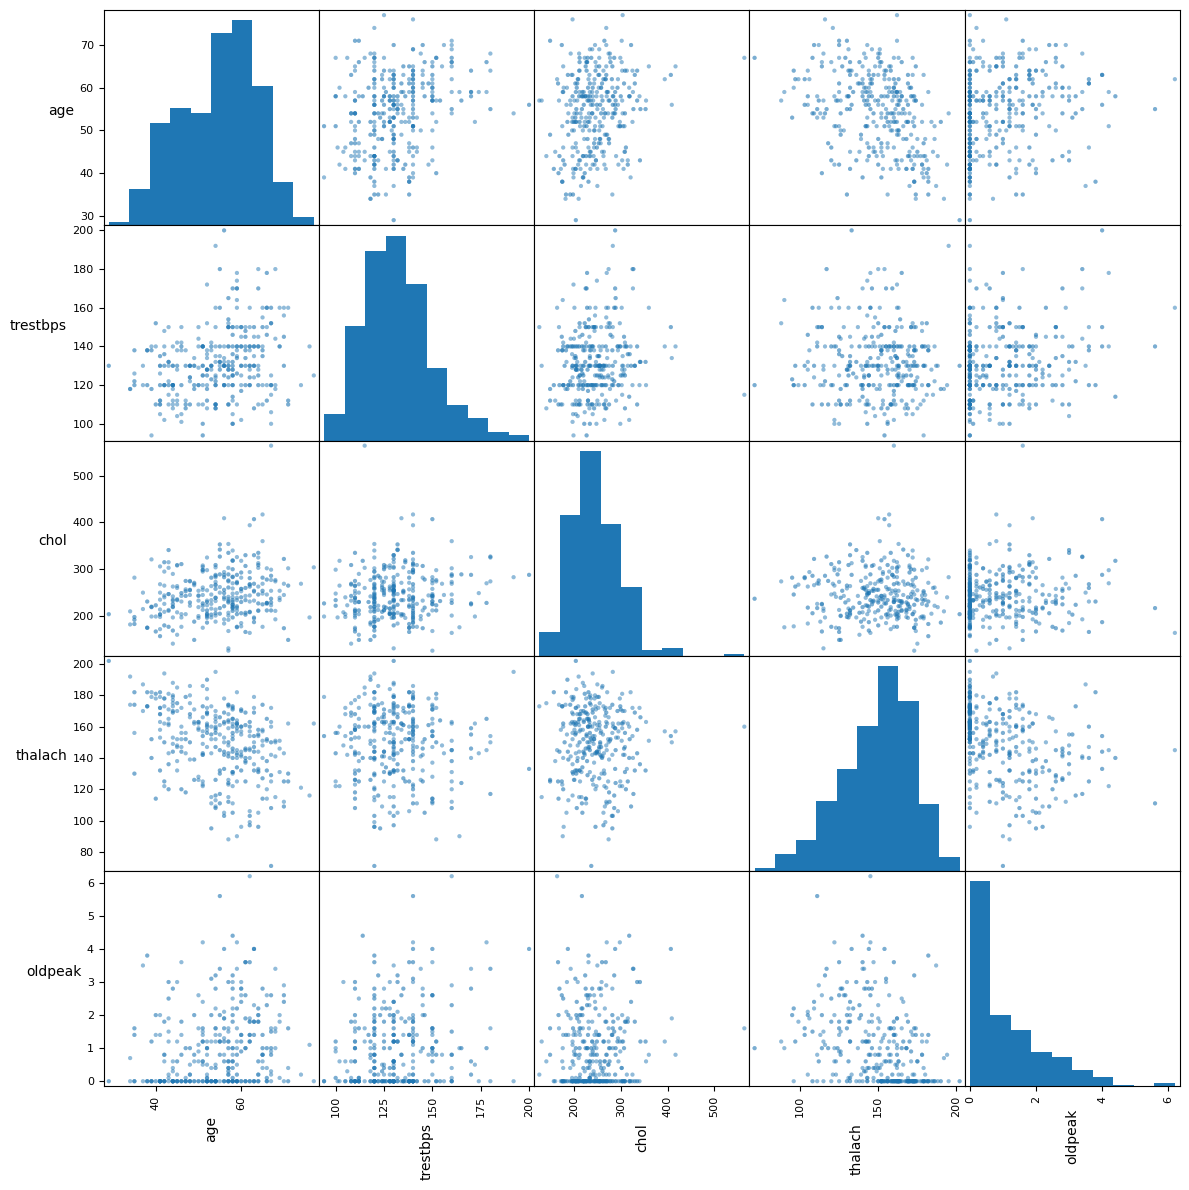

In [202]:
#We can also visually look for patterns in the data.
sel_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
selDF = heart_disease_df[sel_cols]
fig, axes = plt.subplots(nrows=len(seldf.columns), ncols=len(selDF.columns), figsize=(12, 12))
scatter_matrix = pd.plotting.scatter_matrix(selDF, alpha=0.2, ax=axes)

for ax in scatter_matrix.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha("right")

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

In [204]:
#The variable named target contains  the outcomes we would like to predict - ‘0 for ‘abcence of heart disease while 1 being present of heart disease.We can look at the counts for both outcomes, using the value_counts() function. When we set the normalize setting to True we get the the proportions.
cntDiag = cleanDF["target"].value_counts()
cntDiag

target
1    526
0    499
Name: count, dtype: int64

In [207]:

heart_disease_df["target"],heart_disease_df["target"].astype("category")

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1020    1
 1021    0
 1022    0
 1023    1
 1024    0
 Name: target, Length: 1025, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 1020    1
 1021    0
 1022    0
 1023    1
 1024    0
 Name: target, Length: 1025, dtype: category
 Categories (2, int64): [0, 1])

In [208]:
cleanDF[["fbs","cp","trestbps"]].describe()

,fbs,cp,trestbps
count,1025.000000,1025.000000,1025.000000
mean,0.149268,0.942439,131.611707
std,0.356527,1.029641,17.516718
min,0.000000,0.000000,94.000000
25%,0.000000,0.000000,120.000000
50%,0.000000,1.000000,130.000000
75%,0.000000,2.000000,140.000000
max,1.000000,3.000000,200.000000


In [209]:
def normalize(x):
    return(x-min(x))/(
        max(x) - min(x)
    ) # distance of item value - minimum vector value divided by the range of all vector values
testSet1 = np.arange(1.6)
testSet2 = np.arange(1.6)*10
print(f"testSet1: {testSet1}\n")


testSet1: [0. 1.]



In [210]:
print(f"testSet2: {testSet2}\n")

testSet2: [ 0. 10.]



In [211]:
print(f"Normalized testSet1: {normalize(testSet1)}\n")

Normalized testSet1: [0. 1.]



In [212]:
print(f"Normalized testSet2: {normalize(testSet2)}\n")

Normalized testSet2: [0. 1.]



In [213]:
excluded = ["target"]  # list of columns to exclude
# X = cleanDF.loc[:, ~cleanDF.columns.isin(excluded)]
X = cleanDF.drop(excluded, axis=1)
X = X.apply(normalize, axis=0)
X[["fbs", "cp", "trestbps"]].describe()

,fbs,cp,trestbps
count,1025.000000,1025.000000,1025.000000
mean,0.149268,0.314146,0.354827
std,0.356527,0.343214,0.165252
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.245283
50%,0.000000,0.333333,0.339623
75%,0.000000,0.666667,0.433962
max,1.000000,1.000000,1.000000


In [214]:
# Split data into features and target
X = heart_disease_df.drop('target', axis=1)
y = heart_disease_df['target']

In [215]:
y = cleanDF["target"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [216]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [217]:
from sklearn.neighbors import KNeighborsClassifier
# # make predictions on the test set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [218]:
y_pred = knn.predict(X_test)

In [219]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8171206225680934


In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82       132
           1       0.79      0.85      0.82       125

    accuracy                           0.82       257
   macro avg       0.82      0.82      0.82       257
weighted avg       0.82      0.82      0.82       257



In [221]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)
cm

array([[104,  28],
       [ 19, 106]], dtype=int64)

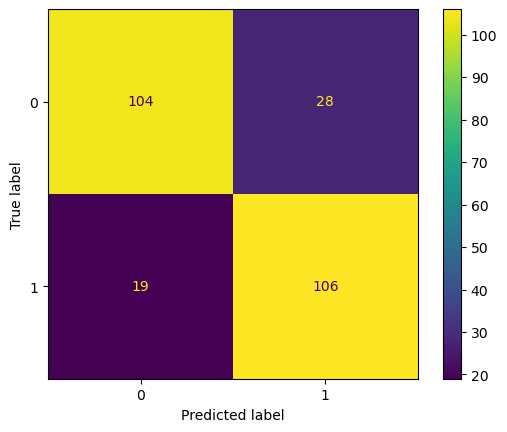

In [222]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()